# LoRA Rank Ablation Study — Visualization

**Model:** DistilBERT (base-uncased)  
**Dataset:** SST-2  
**GPU:** NVIDIA RTX A6000  
**Epochs:** 3

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Style setup for clean, publication-ready plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 11,
    'axes.titlesize': 13,
    'axes.titleweight': 'bold',
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'axes.spines.top': False,
    'axes.spines.right': False,
})

In [ ]:
# Experiment data from JSON summaries
data = {
    'rank': [4, 8, 16, 32],
    'accuracy': [87.84, 87.84, 87.96, 87.96],
    'eval_loss': [0.2847, 0.2846, 0.2842, 0.2846],
    'wall_clock_s': [142.9, 143.2, 145.1, 144.7],
    'throughput': [1413.6, 1411.2, 1392.6, 1395.9],
    'mem_torch_mb': [810.0, 811.2, 813.7, 818.6],
    'mem_nvml_mb': [2396.3, 2396.3, 2400.3, 2404.3],
    'trainable_params': [665858, 739586, 887042, 1181954],
    'total_params': [67620868, 67694596, 67842052, 68136964],
    'step_latency_p50_ms': [19.81, 19.92, 20.10, 20.08],
    'step_latency_p95_ms': [24.26, 24.39, 24.67, 24.64],
}

df = pd.DataFrame(data)
df['trainable_pct'] = df['trainable_params'] / df['total_params'] * 100
df['efficiency'] = df['accuracy'] / (df['trainable_params'] / 100000)  # acc per 100K params

df

,rank,accuracy,eval_loss,wall_clock_s,throughput,mem_torch_mb,mem_nvml_mb,trainable_params,total_params,step_latency_p50_ms,step_latency_p95_ms,trainable_pct,efficiency
0,4,87.84,0.2847,142.9,1413.6,810.0,2396.3,665858,67620868,19.81,24.26,0.984693,13.192002
1,8,87.84,0.2846,143.2,1411.2,811.2,2396.3,739586,67694596,19.92,24.39,1.092533,11.876915
2,16,87.96,0.2842,145.1,1392.6,813.7,2400.3,887042,67842052,20.10,24.67,1.307511,9.916103
3,32,87.96,0.2846,144.7,1395.9,818.6,2404.3,1181954,68136964,20.08,24.64,1.734674,7.441914


In [ ]:
# Color palette
COLORS = {
    'primary': '#2563eb',
    'accent': '#dc2626',
    'secondary': '#059669',
    'tertiary': '#d97706',
    'purple': '#7c3aed',
    'gray': '#6b7280',
}

ranks = df['rank'].astype(str)
x = np.arange(len(ranks))
bar_width = 0.6

## 1. Evaluation Accuracy vs Rank

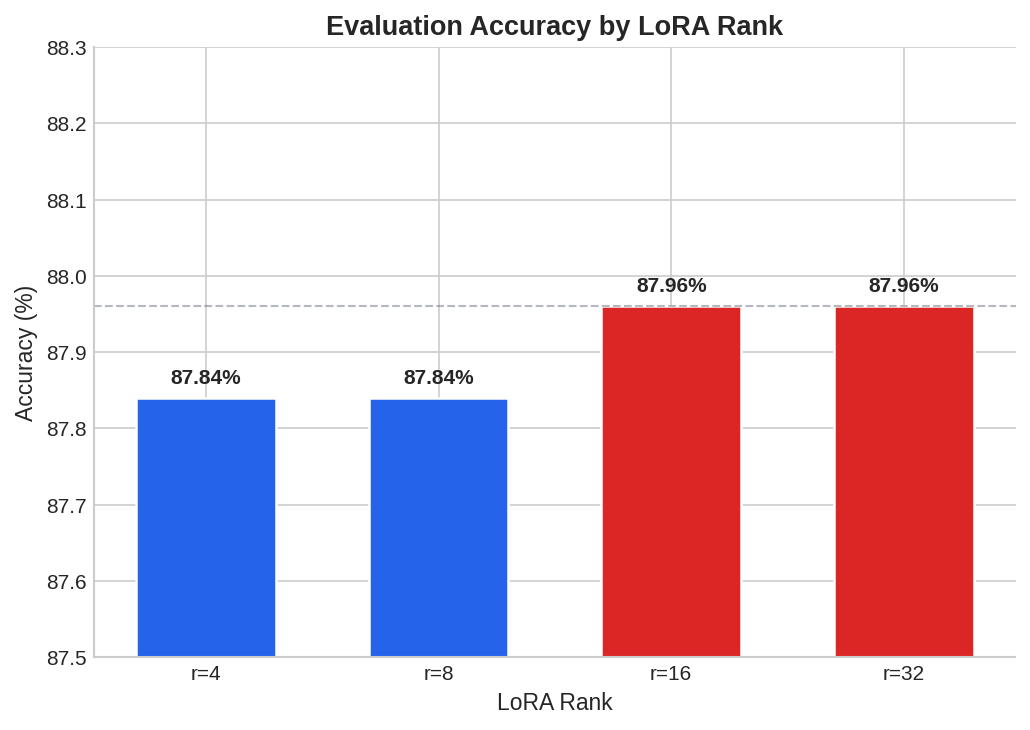

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

colors = [COLORS['accent'] if acc >= 87.95 else COLORS['primary'] for acc in df['accuracy']]
bars = ax.bar(x, df['accuracy'], width=bar_width, color=colors, edgecolor='white', linewidth=1.2)

# Value labels
for bar, val in zip(bars, df['accuracy']):
    ax.annotate(f'{val:.2f}%',
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('LoRA Rank')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Evaluation Accuracy by LoRA Rank')
ax.set_xticks(x)
ax.set_xticklabels([f'r={r}' for r in df['rank']])
ax.set_ylim(87.5, 88.3)
ax.axhline(y=87.96, color=COLORS['gray'], linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.savefig('accuracy_vs_rank.png')
plt.show()

## 2. Trainable Parameters vs Rank

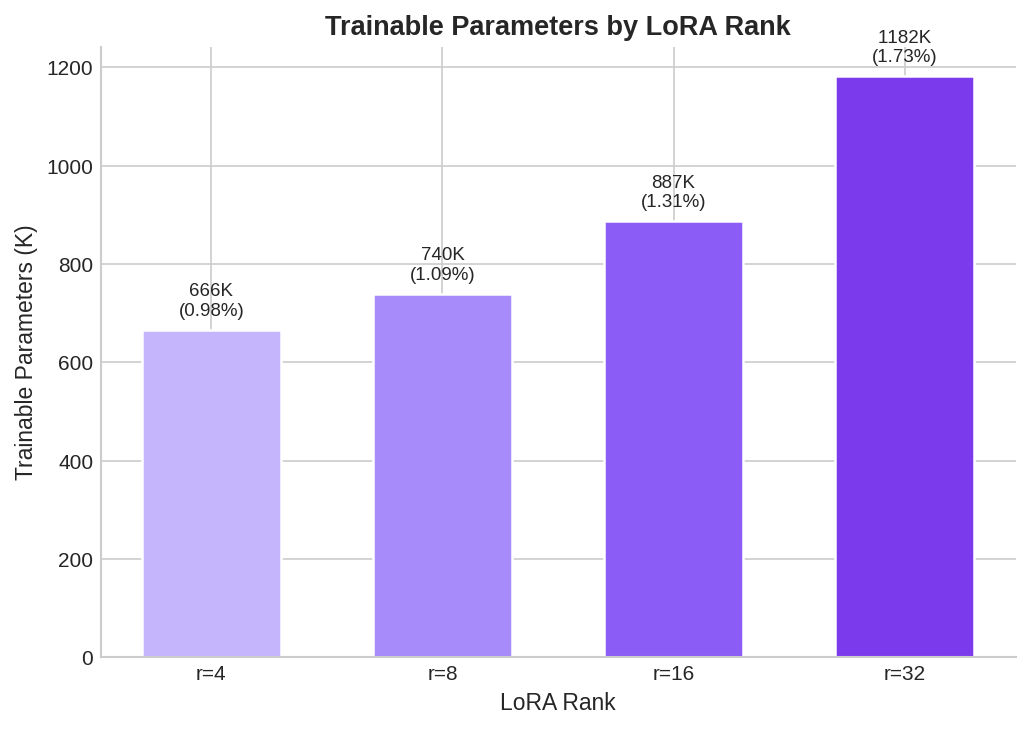

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

# Gradient colors for increasing params
purples = ['#c4b5fd', '#a78bfa', '#8b5cf6', '#7c3aed']
bars = ax.bar(x, df['trainable_params'] / 1000, width=bar_width, color=purples, edgecolor='white', linewidth=1.2)

# Value labels with percentage
for bar, val, pct in zip(bars, df['trainable_params'], df['trainable_pct']):
    ax.annotate(f'{val/1000:.0f}K\n({pct:.2f}%)',
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom', fontsize=9)

ax.set_xlabel('LoRA Rank')
ax.set_ylabel('Trainable Parameters (K)')
ax.set_title('Trainable Parameters by LoRA Rank')
ax.set_xticks(x)
ax.set_xticklabels([f'r={r}' for r in df['rank']])

plt.tight_layout()
plt.savefig('trainable_params_vs_rank.png')
plt.show()

## 3. GPU Memory Usage vs Rank

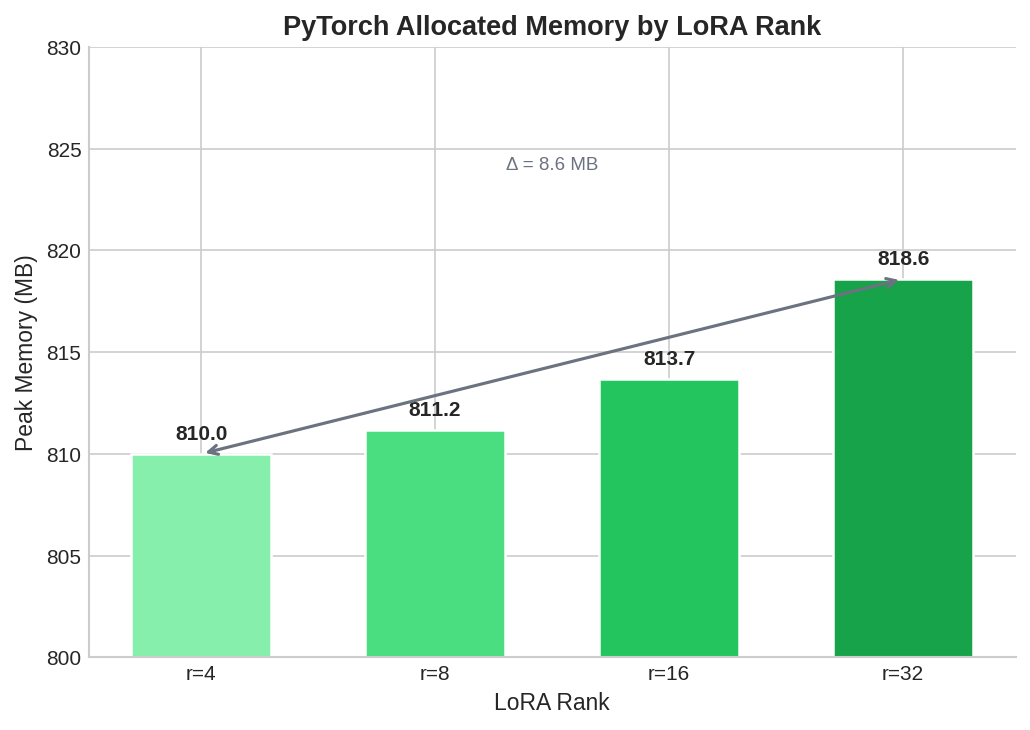

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

greens = ['#86efac', '#4ade80', '#22c55e', '#16a34a']
bars = ax.bar(x, df['mem_torch_mb'], width=bar_width, color=greens, edgecolor='white', linewidth=1.2)

for bar, val in zip(bars, df['mem_torch_mb']):
    ax.annotate(f'{val:.1f}',
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('LoRA Rank')
ax.set_ylabel('Peak Memory (MB)')
ax.set_title('PyTorch Allocated Memory by LoRA Rank')
ax.set_xticks(x)
ax.set_xticklabels([f'r={r}' for r in df['rank']])
ax.set_ylim(800, 830)

# Annotation for delta
ax.annotate('', xy=(3, 818.6), xytext=(0, 810),
            arrowprops=dict(arrowstyle='<->', color=COLORS['gray'], lw=1.5))
ax.text(1.5, 824, 'Δ = 8.6 MB', ha='center', fontsize=9, color=COLORS['gray'])

plt.tight_layout()
plt.savefig('memory_vs_rank.png')
plt.show()

## 4. Training Throughput vs Rank

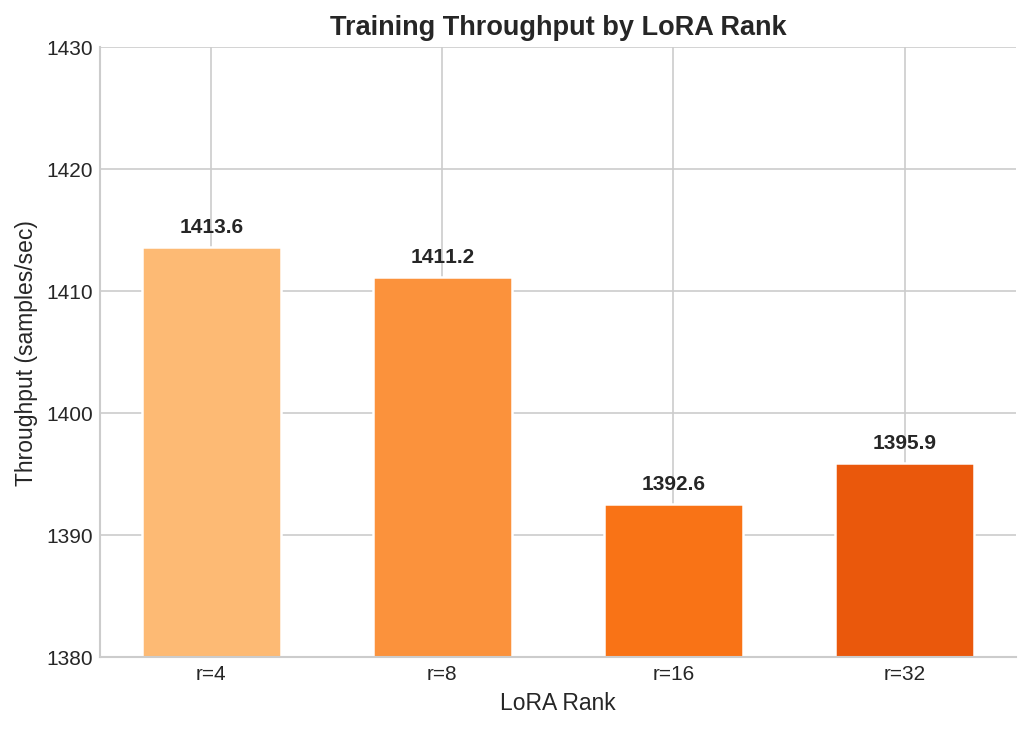

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

oranges = ['#fdba74', '#fb923c', '#f97316', '#ea580c']
bars = ax.bar(x, df['throughput'], width=bar_width, color=oranges, edgecolor='white', linewidth=1.2)

for bar, val in zip(bars, df['throughput']):
    ax.annotate(f'{val:.1f}',
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('LoRA Rank')
ax.set_ylabel('Throughput (samples/sec)')
ax.set_title('Training Throughput by LoRA Rank')
ax.set_xticks(x)
ax.set_xticklabels([f'r={r}' for r in df['rank']])
ax.set_ylim(1380, 1430)

plt.tight_layout()
plt.savefig('throughput_vs_rank.png')
plt.show()

## 5. Parameter Efficiency (Accuracy per 100K Trainable Params)

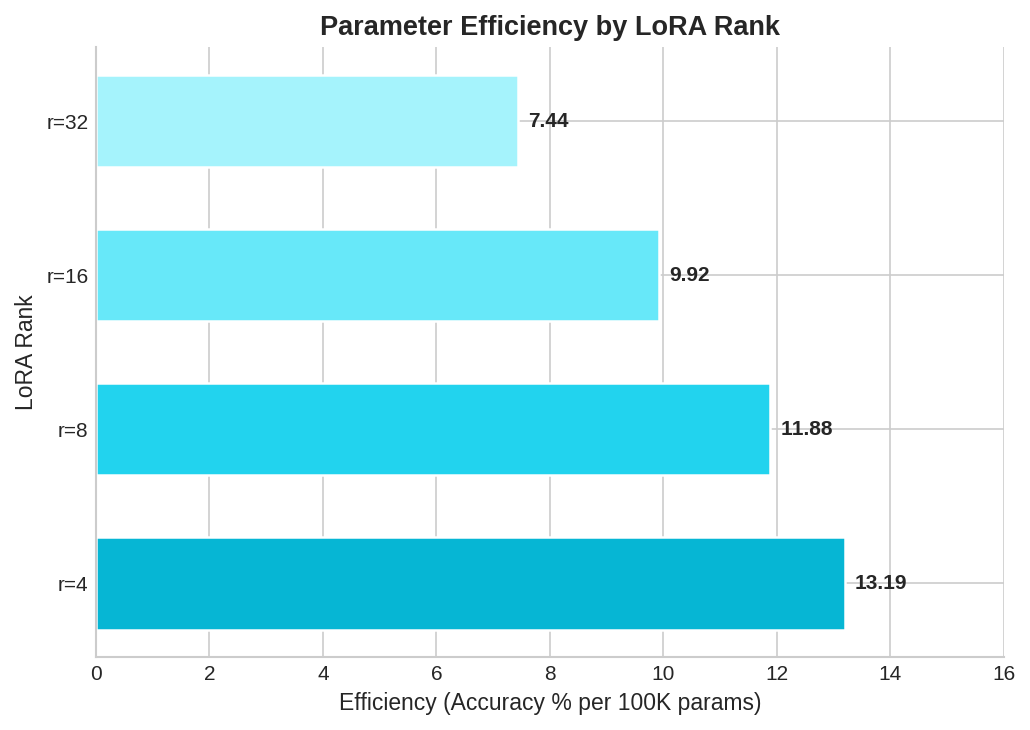

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

cyans = ['#06b6d4', '#22d3ee', '#67e8f9', '#a5f3fc']
bars = ax.barh(x, df['efficiency'], height=bar_width, color=cyans, edgecolor='white', linewidth=1.2)

for bar, val in zip(bars, df['efficiency']):
    ax.annotate(f'{val:.2f}',
                xy=(bar.get_width(), bar.get_y() + bar.get_height()/2),
                xytext=(5, 0), textcoords='offset points',
                ha='left', va='center', fontsize=10, fontweight='bold')

ax.set_ylabel('LoRA Rank')
ax.set_xlabel('Efficiency (Accuracy % per 100K params)')
ax.set_title('Parameter Efficiency by LoRA Rank')
ax.set_yticks(x)
ax.set_yticklabels([f'r={r}' for r in df['rank']])
ax.set_xlim(0, 16)

plt.tight_layout()
plt.savefig('efficiency_vs_rank.png')
plt.show()

## 6. Combined Summary Figure (2x2 Grid)

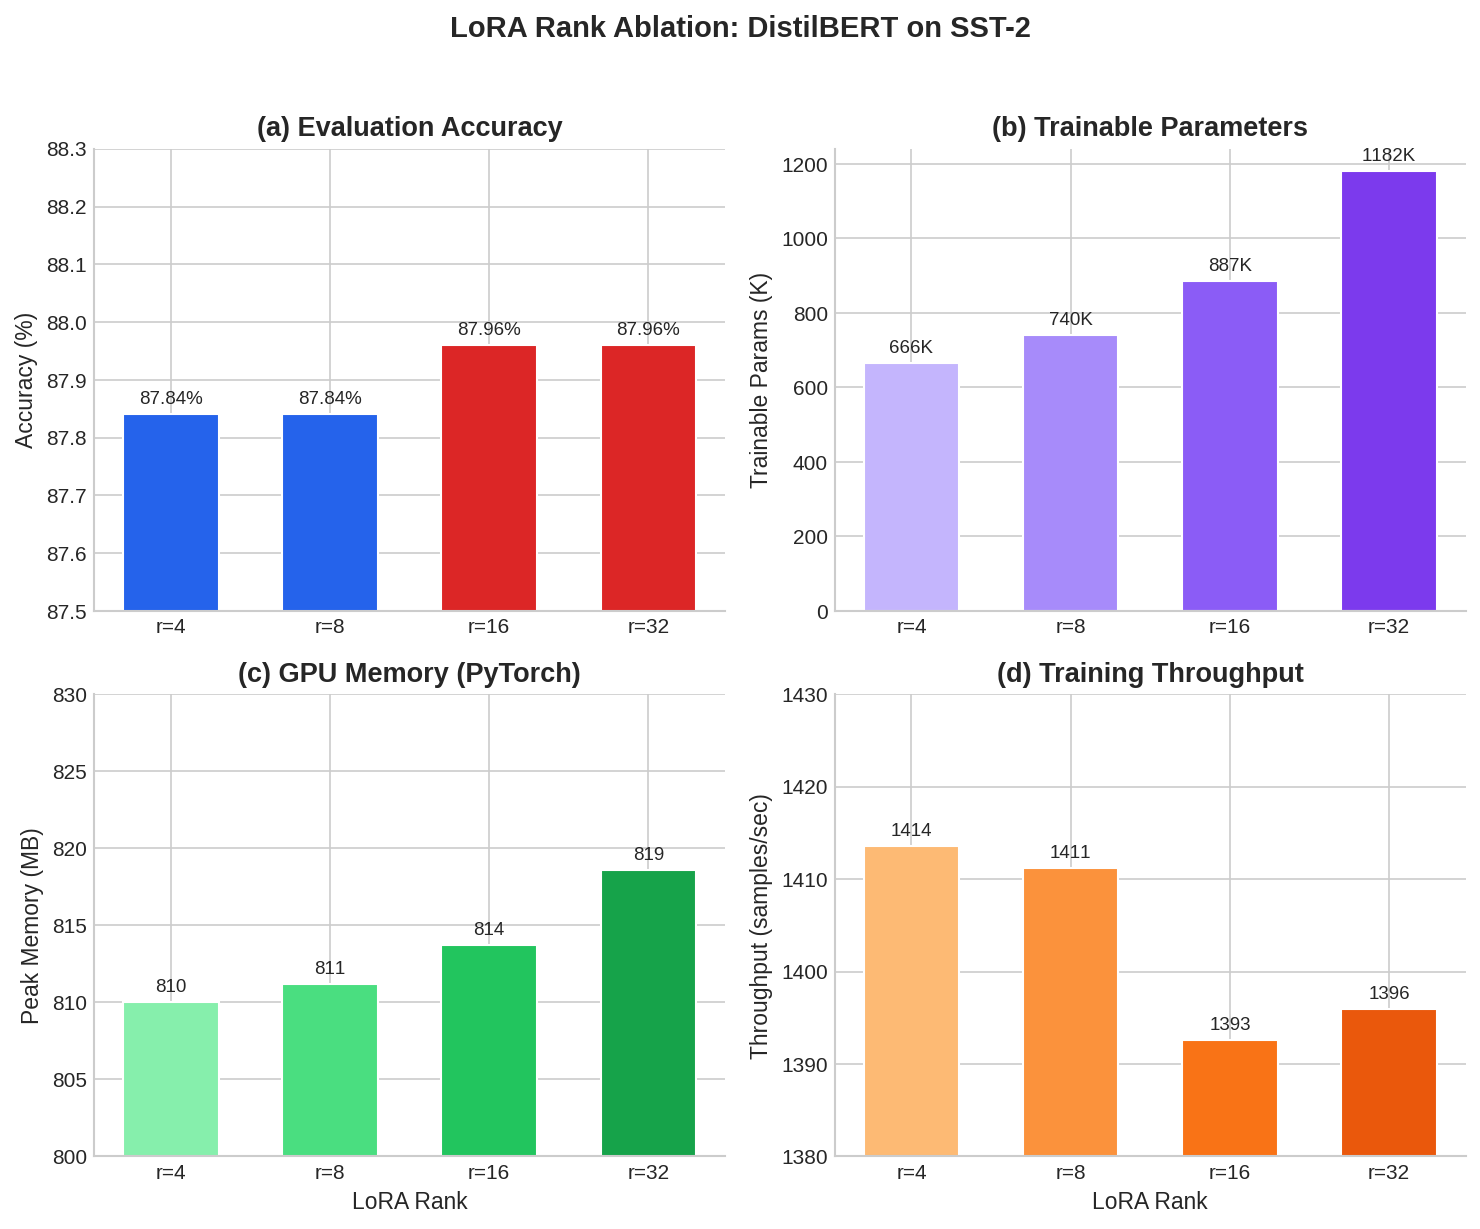

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('LoRA Rank Ablation: DistilBERT on SST-2', fontsize=14, fontweight='bold', y=1.02)

# (a) Accuracy
ax = axes[0, 0]
colors = [COLORS['accent'] if acc >= 87.95 else COLORS['primary'] for acc in df['accuracy']]
bars = ax.bar(x, df['accuracy'], width=bar_width, color=colors, edgecolor='white', linewidth=1)
for bar, val in zip(bars, df['accuracy']):
    ax.annotate(f'{val:.2f}%', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=9)
ax.set_ylabel('Accuracy (%)')
ax.set_title('(a) Evaluation Accuracy')
ax.set_xticks(x)
ax.set_xticklabels([f'r={r}' for r in df['rank']])
ax.set_ylim(87.5, 88.3)

# (b) Trainable Params
ax = axes[0, 1]
bars = ax.bar(x, df['trainable_params'] / 1000, width=bar_width, color=purples, edgecolor='white', linewidth=1)
for bar, val, pct in zip(bars, df['trainable_params'], df['trainable_pct']):
    ax.annotate(f'{val/1000:.0f}K', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=9)
ax.set_ylabel('Trainable Params (K)')
ax.set_title('(b) Trainable Parameters')
ax.set_xticks(x)
ax.set_xticklabels([f'r={r}' for r in df['rank']])

# (c) Memory
ax = axes[1, 0]
bars = ax.bar(x, df['mem_torch_mb'], width=bar_width, color=greens, edgecolor='white', linewidth=1)
for bar, val in zip(bars, df['mem_torch_mb']):
    ax.annotate(f'{val:.0f}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=9)
ax.set_xlabel('LoRA Rank')
ax.set_ylabel('Peak Memory (MB)')
ax.set_title('(c) GPU Memory (PyTorch)')
ax.set_xticks(x)
ax.set_xticklabels([f'r={r}' for r in df['rank']])
ax.set_ylim(800, 830)

# (d) Throughput
ax = axes[1, 1]
bars = ax.bar(x, df['throughput'], width=bar_width, color=oranges, edgecolor='white', linewidth=1)
for bar, val in zip(bars, df['throughput']):
    ax.annotate(f'{val:.0f}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=9)
ax.set_xlabel('LoRA Rank')
ax.set_ylabel('Throughput (samples/sec)')
ax.set_title('(d) Training Throughput')
ax.set_xticks(x)
ax.set_xticklabels([f'r={r}' for r in df['rank']])
ax.set_ylim(1380, 1430)

plt.tight_layout()
plt.savefig('lora_ablation_summary.png', dpi=300)
plt.show()

## 7. Accuracy vs Parameter Count (Tradeoff Plot)

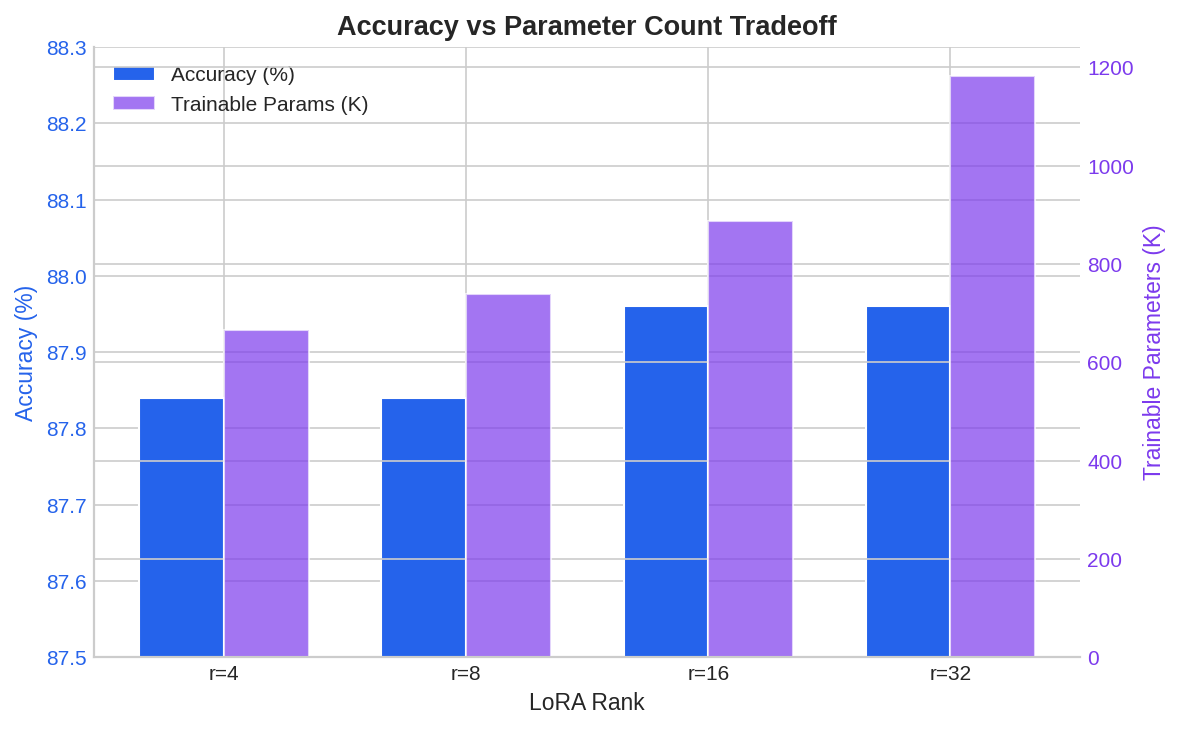

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.35
x_pos = np.arange(len(df))

# Normalize for dual axis effect using grouped bars
ax.bar(x_pos - bar_width/2, df['accuracy'], bar_width, label='Accuracy (%)', color=COLORS['primary'], edgecolor='white')

ax2 = ax.twinx()
ax2.bar(x_pos + bar_width/2, df['trainable_params'] / 1000, bar_width, label='Trainable Params (K)', color=COLORS['purple'], alpha=0.7, edgecolor='white')

ax.set_xlabel('LoRA Rank')
ax.set_ylabel('Accuracy (%)', color=COLORS['primary'])
ax2.set_ylabel('Trainable Parameters (K)', color=COLORS['purple'])
ax.set_title('Accuracy vs Parameter Count Tradeoff')
ax.set_xticks(x_pos)
ax.set_xticklabels([f'r={r}' for r in df['rank']])
ax.set_ylim(87.5, 88.3)
ax.tick_params(axis='y', labelcolor=COLORS['primary'])
ax2.tick_params(axis='y', labelcolor=COLORS['purple'])

# Combined legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('accuracy_params_tradeoff.png')
plt.show()

## Summary Table

In [ ]:
summary_df = df[['rank', 'accuracy', 'trainable_params', 'trainable_pct', 'mem_torch_mb', 'throughput', 'efficiency']].copy()
summary_df.columns = ['Rank', 'Accuracy (%)', 'Trainable Params', '% of Total', 'Memory (MB)', 'Throughput (s/s)', 'Efficiency']
summary_df['Trainable Params'] = summary_df['Trainable Params'].apply(lambda x: f'{x:,}')
summary_df['% of Total'] = summary_df['% of Total'].apply(lambda x: f'{x:.2f}%')
summary_df['Efficiency'] = summary_df['Efficiency'].apply(lambda x: f'{x:.2f}')
summary_df

,Rank,Accuracy (%),Trainable Params,% of Total,Memory (MB),Throughput (s/s),Efficiency
0,4,87.84,"665,858",0.98%,810.0,1413.6,13.19
1,8,87.84,"739,586",1.09%,811.2,1411.2,11.88
2,16,87.96,"887,042",1.31%,813.7,1392.6,9.92
3,32,87.96,"1,181,954",1.73%,818.6,1395.9,7.44


---

**Key Findings:**
- Rank 16 achieves peak accuracy (87.96%) with only 1.31% trainable parameters
- Rank 32 doubles parameters vs rank 16 with no accuracy gain
- Memory overhead is minimal (~8.6 MB across all ranks)
- Rank 4 offers best parameter efficiency for memory-constrained deployments